# Data Preprocessing

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
df = pd.read_csv('train.csv')
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [192]:
df.shape

(31647, 18)

### The ID column is not much useful for the  analysis, so removing the ID column is the best option 

In [193]:
del df['ID']

In [194]:
df.job.value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

### here there are 206 unknown values (missing values), so we replacing the unknown with the mode of the job

In [195]:
df.job.mode()

0    blue-collar
dtype: object

In [196]:
df.job = df.job.replace(to_replace = 'unknown', value = 'blue-collar')

In [197]:
df.education.value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

### Here education column has 1314 unknown values (missing values), so replacing it with the mode of education is best option

In [198]:
df.education.mode()

0    secondary
dtype: object

In [199]:
df.education = df.education.replace(to_replace = 'unknown', value = 'secondary')

In [200]:
df.contact.value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

### Here the column 'contact'  has 9177 unknown values(missing values), so replacing it with mode of the contact is best option

In [201]:
df.contact.mode()

0    cellular
dtype: object

In [202]:
df.contact = df.contact.replace(to_replace = 'unknown', value = 'cellular' )

In [203]:
df.poutcome.value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [204]:
(25929/df.poutcome.count())*100

81.93193667646223

### Here as we can see that, almost 82% values of the column 'poutcome' are unknown, so removing the poutcome column is the best option

In [205]:
del df['poutcome']

In [206]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,56,admin.,married,secondary,no,1933,no,no,telephone,19,nov,44,2,-1,0,no
1,31,blue-collar,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,no


In [207]:
# joining the day and month column

df['year']=2020
df.month = df.month.map({'jan':1,'feb':2,'mar':3,'april':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
df['date'] = pd.to_datetime(df[["day","month", "year"]])
df['date']=df.date.dt.strftime('%m-%d')
df.date.head()

0    11-19
1    07-20
2    07-18
3    06-22
4    02-04
Name: date, dtype: object

In [208]:
df = df.drop(['day','month','year'], axis = 1)

In [209]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,subscribed,date
0,56,admin.,married,secondary,no,1933,no,no,telephone,44,2,-1,0,no,11-19
1,31,blue-collar,married,secondary,no,3,no,no,cellular,91,2,-1,0,no,07-20


# Exploratory data analysis

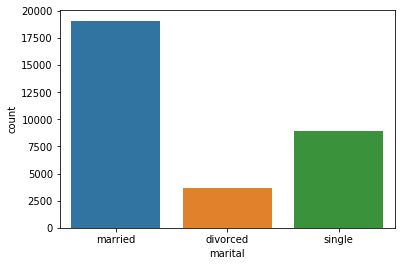

In [210]:
sns.countplot(x = 'marital', data = df)

### Here we can see that, most of the clients are married, while very few of the clients are divorced

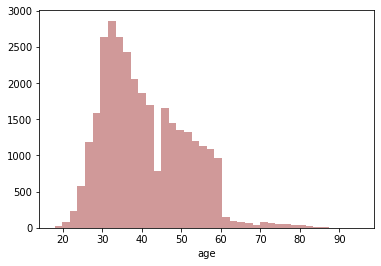

In [211]:
sns.distplot(df['age'], kde=False, color='darkred', bins = 40)

### Here we can see that, most of the clients are from age group of approx. 30-43

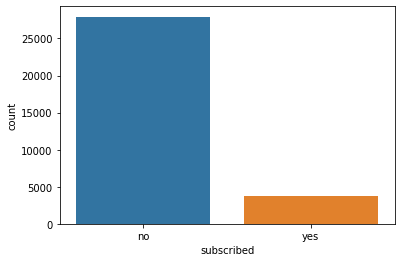

In [212]:
sns.countplot(x = 'subscribed', data = df)

### Here as we can see that, the data is imbalanced, so we need to balance the data set before performing prediction on this data set.

## Hypothesis Testing

In [213]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('age ~ subscribed', data = df).fit()
aov = sm.stats.anova_lm(mod)
print (aov)


                 df        sum_sq      mean_sq          F    PR(>F)
subscribed      1.0  2.151153e+03  2151.152638  19.065588  0.000013
Residual    31645.0  3.570476e+06   112.829073        NaN       NaN


In [214]:
pvalue = 0.000013
alpha = 0.05

pvalue < alpha 

True

### Reject H0 : We do not have enough evidence to accept null hypothesis. 
### age and subscribed are not independent 

In [215]:
mod = ols('balance ~ subscribed', data = df).fit() # continuous ~ categorical
aov = sm.stats.anova_lm(mod)
print (aov)


                 df        sum_sq       mean_sq          F        PR(>F)
subscribed      1.0  7.491401e+08  7.491401e+08  81.897908  1.512795e-19
Residual    31645.0  2.894645e+11  9.147243e+06        NaN           NaN


In [216]:
pvalue = 1.512795e-19
alpha = 0.05

pvalue < alpha 

True

### Reject H0 : We do not have enough evidence to accept null hypothesis. 
### balance and subscribed are not independent 

In [217]:
mod = ols('duration ~ subscribed', data = df).fit() # continuous ~ categorical
aov = sm.stats.anova_lm(mod)
print (aov)

                 df        sum_sq       mean_sq            F  PR(>F)
subscribed      1.0  3.179477e+08  3.179477e+08  5671.062516     0.0
Residual    31645.0  1.774175e+09  5.606493e+04          NaN     NaN


In [218]:
pvalue = 0.0
alpha = 0.05

pvalue < alpha 

True

### Reject H0 : We do not have enough evidence to accept null hypothesis. 
### duration and subscribed are not independent 

In [219]:
mod = ols('pdays ~ subscribed', data = df).fit() # continuous ~ categorical
aov = sm.stats.anova_lm(mod)
print (aov)

                 df        sum_sq       mean_sq           F        PR(>F)
subscribed      1.0  3.660531e+06  3.660531e+06  375.492162  3.621753e-83
Residual    31645.0  3.084951e+08  9.748621e+03         NaN           NaN


In [220]:
pvalue = 3.621753e-83
alpha = 0.05

pvalue < alpha 

True

### Reject H0 : We do not have enough evidence to accept null hypothesis. 
### pdays and subscribed are not independent 

In [221]:
mod = ols('previous ~ subscribed', data = df).fit() # continuous ~ categorical
aov = sm.stats.anova_lm(mod)
print (aov)

                 df         sum_sq      mean_sq           F        PR(>F)
subscribed      1.0    1440.861061  1440.861061  247.430356  1.532171e-55
Residual    31645.0  184278.311562     5.823299         NaN           NaN


In [222]:
pvalue = 1.532171e-55
alpha = 0.05

pvalue < alpha 

True

### Reject H0 : We do not have enough evidence to accept null hypothesis. 
### previous and subscribed are not independent 

In [223]:
mod = ols('campaign ~ subscribed', data = df).fit() # continuous ~ categorical
aov = sm.stats.anova_lm(mod)
print (aov)

                 df         sum_sq      mean_sq           F        PR(>F)
subscribed      1.0    1529.671583  1529.671583  158.549603  2.868101e-36
Residual    31645.0  305307.968635     9.647905         NaN           NaN


In [224]:
pvalue = 2.868101e-36
alpha = 0.05

pvalue < alpha 

True

### Reject H0 : We do not have enough evidence to accept null hypothesis. 
### campaign and subscribed are not independent 

## Chisquare test

In [225]:
t1 = pd.crosstab(df.marital, df.subscribed)
display(t1)

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [226]:
stats.chi2_contingency(t1)

(153.28022173639636,
 5.195445069769366e-34,
 2,
 array([[ 3203.87904067,   426.12095933],
        [16853.46288748,  2241.53711252],
        [ 7874.65807186,  1047.34192814]]))

In [227]:
p_value = 5.195445069769366e-34
alpha = 0.05

p_value < alpha

True

### Reject H0 : We do not have enough evidence to accept null hypothesis. 
### marital and subscribed are not independent 

In [228]:
t1 = pd.crosstab(df.education, df.subscribed)
display(t1)
stats.chi2_contingency(t1)

subscribed,no,yes
education,,
primary,4381,427
secondary,15665,1873
tertiary,7886,1415


(165.26654244521012,
 1.296660515577709e-36,
 2,
 array([[ 4243.5951591 ,   564.4048409 ],
        [15479.23708408,  2058.76291592],
        [ 8209.16775682,  1091.83224318]]))

In [229]:
p_value = 1.296660515577709e-36
alpha = 0.05

p_value < alpha

True

### Reject H0 : We do not have enough evidence to accept null hypothesis. 
### education and subscribed are not independent 

In [230]:
t1 = pd.crosstab(df.default, df.subscribed)
display(t1)
stats.chi2_contingency(t1)

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


(12.411008105369966,
 0.00042681039656274696,
 1,
 array([[27415.67238601,  3646.32761399],
        [  516.32761399,    68.67238601]]))

In [231]:
p_value =  0.00042681039656274696
alpha = 0.05

p_value < alpha

True

### Reject H0 : We do not have enough evidence to accept null hypothesis. 
### default and subscribed are not independent 

In [232]:
t1 = pd.crosstab(df.housing, df.subscribed)
display(t1)

stats.chi2_contingency(t1)

subscribed,no,yes
housing,,
no,11698,2365
yes,16234,1350


(629.1109608699362,
 7.801523512528638e-139,
 1,
 array([[12412.16279584,  1650.83720416],
        [15519.83720416,  2064.16279584]]))

In [233]:
p_value =   7.801523512528638e-139
alpha = 0.05

p_value < alpha

True

### Reject H0 : We do not have enough evidence to accept null hypothesis. 
### housing and subscribed are not independent 

In [234]:
t1 = pd.crosstab(df.loan, df.subscribed)
display(t1)

stats.chi2_contingency(t1)

subscribed,no,yes
loan,,
no,23132,3384
yes,4800,331


(164.66173505098124,
 1.0844353350935101e-37,
 1,
 array([[23403.32138907,  3112.67861093],
        [ 4528.67861093,   602.32138907]]))

In [235]:
p_value =   1.0844353350935101e-37
alpha = 0.05

p_value < alpha

True

### Reject H0 : We do not have enough evidence to accept null hypothesis. 
### loan and subscribed are not independent 

In [236]:
t1 = pd.crosstab(df.contact, df.subscribed)
stats.chi2_contingency(t1)

(3.7310894212115757,
 0.05340854858223045,
 1,
 array([[26125.29465668,  3474.70534332],
        [ 1806.70534332,   240.29465668]]))

In [237]:
pvalue = 0.05340854858223045 
pvalue<0.05

False

### Here since the pvalue is not less than the 0.05, we don't have enough evidence to accept the null hupothesis

### Since there is no relation between contact and subscribed, removing the contact column is the best option

In [238]:
del df['contact']

In [239]:
dt = df.copy()

In [240]:
dt.head(2)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,subscribed,date
0,56,admin.,married,secondary,no,1933,no,no,44,2,-1,0,no,11-19
1,31,blue-collar,married,secondary,no,3,no,no,91,2,-1,0,no,07-20


### Seperating independent and dependent variable

In [241]:
from sklearn.preprocessing import LabelEncoder
df[['subscribed']] = df[['subscribed']].apply(LabelEncoder().fit_transform)

X = df.drop('subscribed', axis = 1)
y = df['subscribed']


In [242]:
X.shape, y.shape

((31647, 13), (31647,))

## Balancing the data set

In [243]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
balanced_X, balanced_y = os.fit_sample(X,y)

In [244]:
balanced_X.shape, balanced_y.shape

((55864, 13), (55864,))

## Feature Encoding and Scaling

In [245]:
balanced_X = balanced_X.join(pd.get_dummies(balanced_X['job'], prefix='job'))

In [246]:
balanced_X = balanced_X.join(pd.get_dummies(balanced_X['marital'], prefix = 'marital'))

In [247]:
balanced_X = balanced_X.join(pd.get_dummies(balanced_X['education'], prefix = 'education'))

In [248]:
balanced_X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'duration', 'campaign', 'pdays', 'previous', 'date',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary'],
      dtype='object')

In [249]:
balanced_X = balanced_X.drop(['job','marital','education','job_admin.','marital_divorced','education_primary'], axis = 1)

In [250]:
from sklearn.preprocessing import LabelEncoder

balanced_X[['default','housing','loan']] = balanced_X[['default','housing','loan']].apply(LabelEncoder().fit_transform)

In [251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

balanced_X.age = scaler.fit_transform(balanced_X[['age']])
balanced_X.balance = scaler.fit_transform(balanced_X[['balance']])
balanced_X.duration = scaler.fit_transform(balanced_X[['duration']])
balanced_X.campaign = scaler.fit_transform(balanced_X[['campaign']])
balanced_X.pdays = scaler.fit_transform(balanced_X[['pdays']])
balanced_X.previous = scaler.fit_transform(balanced_X[['previous']])

In [252]:
balanced_X = balanced_X.drop('date', axis = 1)

In [253]:
balanced_X.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,job_blue-collar,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
0,1.241709,0,0.124448,0,0,-0.955736,-0.190561,-0.485664,-0.332219,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.861703,0,-0.485704,0,0,-0.821514,-0.190561,-0.485664,-0.332219,1,...,0,0,0,0,0,0,1,0,1,0
2,-1.198249,0,-0.204970,1,0,-0.396001,-0.560324,-0.485664,-0.332219,0,...,0,0,1,0,0,0,1,0,1,0
3,1.325846,0,0.552503,0,0,1.394581,-0.560324,0.291010,0.887088,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.861703,0,-0.449031,1,0,0.003810,-0.560324,-0.485664,-0.332219,0,...,0,0,0,0,1,0,1,0,1,0


In [254]:
balanced_y.head()

0    0
1    0
2    0
3    1
4    0
Name: subscribed, dtype: int32

# Model building

In [255]:
## Train Test split

from sklearn.model_selection import train_test_split

In [256]:
X_train,X_test,y_train,y_test = train_test_split(balanced_X,balanced_y, test_size = 0.3, random_state=1)

## Logistic regression

In [257]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train,y_train)

y_pred_log = model_log.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_pred_log,y_test)

0.7962410501193318

In [258]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred_log,y_test)

0.7964141637313008

### Here we can see that the accuracy and roc_auc_score of logistic regression is almost 79%

## Decision Tree

In [259]:
dt.head(2)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,subscribed,date
0,56,admin.,married,secondary,no,1933,no,no,44,2,-1,0,no,11-19
1,31,blue-collar,married,secondary,no,3,no,no,91,2,-1,0,no,07-20


In [260]:
dt[['subscribed']] = dt[['subscribed']].apply(LabelEncoder().fit_transform)

In [261]:
dt_X = dt.drop(['subscribed','date'],axis=1)
dt_y = dt['subscribed']
dt_X.shape,dt_y.shape

((31647, 12), (31647,))

In [262]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
dt_X, dt_y = os.fit_sample(dt_X,dt_y)
dt_X.shape,dt_y.shape

((55864, 12), (55864,))

In [263]:
dt_X[['job','marital','education','default','housing','loan']] = dt_X[['job','marital','education','default','housing','loan']].apply(LabelEncoder().fit_transform)

In [264]:
dt_X.head(5)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous
0,56,0,1,1,0,1933,0,0,44,2,-1,0
1,31,1,1,1,0,3,0,0,91,2,-1,0
2,27,7,1,1,0,891,1,0,240,1,-1,0
3,57,4,0,2,0,3287,0,0,867,1,84,3
4,31,9,1,1,0,119,1,0,380,1,-1,0


In [265]:
dt_X_train,dt_X_test,dt_y_train,dt_y_test = train_test_split(dt_X,dt_y, test_size = 0.3, random_state = 1)

In [266]:
from sklearn import tree

model_dt = tree.DecisionTreeClassifier()
model_dt.fit(dt_X_train,dt_y_train)

y_pred_dt = model_dt.predict(dt_X_test)

print('Accuracy :', accuracy_score(y_pred_dt,dt_y_test))
print('Auc :', roc_auc_score(y_pred_dt,dt_y_test))

Accuracy : 0.9479116945107399
Auc : 0.9519648112742153


## Random Forest

In [267]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 25, random_state=1)
model_rf.fit(dt_X_train,dt_y_train)
y_pred_rf = model_rf.predict(dt_X_test)

In [268]:
print('Accuracy score :', accuracy_score(dt_y_test,y_pred_rf))
print('Auc score :', roc_auc_score(dt_y_test,y_pred_rf))

Accuracy score : 0.9566229116945107
Auc score : 0.9568467679967433


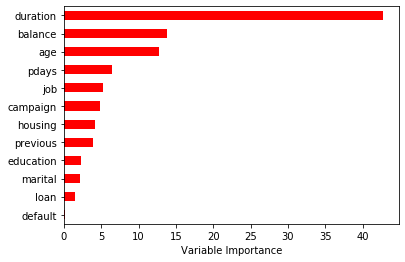

In [269]:
Importance = pd.DataFrame({'Importance':model_rf.feature_importances_*100}, index=dt_X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## SVM

In [154]:
from sklearn.svm import SVC
 
svm = SVC(kernel = 'rbf', random_state=1, gamma = 0.1, C=10.0)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

In [155]:
print('Accuracy score :', accuracy_score(y_test,y_pred_svm))
print('Auc : ', roc_auc_score(y_test,y_pred_svm))

Accuracy score : 0.8468973747016706
Auc :  0.8470960269525055


## Naive Baye's

In [156]:
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()
gb.fit(X_train,y_train)
model_gb = gb.predict(X_test)

In [157]:
print('Accuracy :', accuracy_score(y_test,model_gb))
print('Auc :', roc_auc_score(y_test,model_gb))

Accuracy : 0.7165871121718377
Auc : 0.7164102014418776


In [164]:
print('Logistic accuracy      : ', accuracy_score(y_test,y_pred_log),'       ', 'Logistic Auc      :', roc_auc_score(y_test,y_pred_log))
print()
print('Decision Tree accuracy : ', accuracy_score(dt_y_test,y_pred_dt),'      ', 'Decision Tree Auc :', roc_auc_score(dt_y_test,y_pred_dt))
print()
print('Random Forest accuracy : ', accuracy_score(dt_y_test,y_pred_rf),'      ', 'Random Forest Auc :', roc_auc_score(dt_y_test,y_pred_rf))
print()
print('SVM accuracy           : ', accuracy_score(y_test,y_pred_svm),'      ', 'SVM Auc           :', roc_auc_score(y_test,y_pred_svm))
print()
print('Naive Bayes accuracy   : ', accuracy_score(y_test,model_gb),'      ', 'Naive Bayes Auc   :', roc_auc_score(y_test,model_gb))

Logistic accuracy      :  0.798926014319809         Logistic Auc      : 0.7988741763981704

Decision Tree accuracy :  0.9492243436754176        Decision Tree Auc : 0.9495021808704317

Random Forest accuracy :  0.9582338902147971        Random Forest Auc : 0.9584621476706701

SVM accuracy           :  0.8468973747016706        SVM Auc           : 0.8470960269525055

Naive Bayes accuracy   :  0.7165871121718377        Naive Bayes Auc   : 0.7164102014418776


### Here we can see that, the accuracy and auc score of Random Forest are higher than compared to other models, so we will use Random Forest model to predict on Test data set

# Test data set

## Data Preprocessing

In [270]:
bank = pd.read_csv('test.csv')
bank.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


### Here we will delete and keep the same exact columns which we did in train data set

In [271]:
del bank['ID']

In [272]:
del bank['contact']

In [273]:
del bank['month']

In [274]:
del bank['day']

In [275]:
del bank['poutcome']

In [276]:
bank.job = bank.job.replace(to_replace='unknown', value='blue-collar')

In [277]:
bank.education = bank.education.replace(to_replace='unknown', value ='secondary')

# Feature Encoding/scaling

In [278]:
bank[['job','marital','education','default','housing','loan']] = bank[['job','marital','education','default','housing','loan']].apply(LabelEncoder().fit_transform)

In [279]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous
0,32,7,1,1,0,118,1,0,20,6,-1,0
1,78,5,0,0,0,2787,0,0,372,1,-1,0
2,31,6,2,2,0,144,1,0,676,1,-1,0
3,57,7,2,0,0,3777,1,0,65,2,-1,0
4,45,1,0,1,0,-705,0,1,111,1,-1,0


# Applying random forest model on the test data set

In [280]:
test_rf = model_rf.predict(bank)

In [281]:
test_rf

array([0, 1, 0, ..., 0, 1, 0])

In [282]:
bank['subscribed'] = test_rf

# preparing the final test data set with subscribed column

In [283]:
final_test_set = pd.read_csv('test.csv')

In [284]:
final_test_set.job = final_test_set.job.replace(to_replace='unknown', value='blue-collar')
final_test_set.education = final_test_set.education.replace(to_replace='unknown', value ='secondary')

In [285]:
final_test_set['subscribed'] = test_rf

In [286]:
final_test_set.subscribed = final_test_set.subscribed.map({0 : 'no', 1:'yes'})

In [287]:
final_test_set.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown,no
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,yes
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,no
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown,no
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown,no


In [288]:
final_test_set.subscribed.value_counts()

no     11680
yes     1884
Name: subscribed, dtype: int64

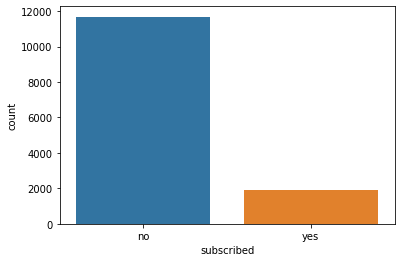

In [289]:
sns.countplot(x = 'subscribed', data = final_test_set)

In [290]:
(1888/final_test_set.subscribed.count())*100

13.919197876732529

### Here we can conclude that, probably approximate 14% of the clients will subscribe to the term deposit.